In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [22]:
books = pd.read_csv('hq_merged.csv')
books = books.dropna()
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,Year-Of-Publication-Bin-Encode,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded
0,277427,002542730X,10,politically correct bedtime story modern tale ...,James Finn Garner,1994,John Wiley & Sons Inc,"[1980, 2000)",2660,622,4,gilbert,others,usa,48,40~60,3064,23,6
1,277427,0060006641,10,writing well th anniversary classic guide writ...,William Zinsser,2001,HarperResource,"[2000, 2020)",6400,525,5,gilbert,others,usa,48,40~60,3064,23,6
2,277427,0060542128,7,storm break,Heather Lowell,2003,HarperTorch,"[2000, 2020)",2330,528,5,gilbert,others,usa,48,40~60,3064,23,6
3,277427,0061009059,9,one money stephanie plum novel paperback,Janet Evanovich,1995,HarperTorch,"[1980, 2000)",2766,528,4,gilbert,others,usa,48,40~60,3064,23,6
4,277427,0152050167,10,whale rider,Witi Ihimaera,2003,Harcourt Paperbacks,"[2000, 2020)",6405,495,5,gilbert,others,usa,48,40~60,3064,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54809,35433,3499123665,10,die hexen von eastwick roman,John Updike,1987,Rowohlt Tb.,"[1980, 2000)",3145,1018,4,wangen,others,others,40,20~40,8858,23,3
54810,35433,3499150425,10,garp und wie er die welt sah,John Irving,1982,Rowohlt Tb.,"[1980, 2000)",3083,1018,4,wangen,others,others,40,20~40,8858,23,3
54811,35433,3548253881,9,da spiel,Stephen King,2002,Ullstein Tb,"[2000, 2020)",5762,1223,5,wangen,others,others,40,20~40,8858,23,3
54812,35433,3596259924,7,die unertragliche leichtigkeit de seins unbear...,Milan Kundera,1997,Distribooks Inc,"[1980, 2000)",4476,314,4,wangen,others,others,40,20~40,8858,23,3


In [23]:
books['Book-Author'].value_counts()

Book-Author
Stephen King        1489
Nora Roberts         898
James Patterson      569
John Grisham         512
Janet Evanovich      464
                    ... 
Candace Irvin          1
Monica McInerney       1
Judy Barron            1
Jan Siegel             1
Erich Kaestner         1
Name: count, Length: 5264, dtype: int64

In [24]:
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    5636
2001    4702
2003    4499
1999    4241
2000    4055
        ... 
1942       2
1949       2
1950       2
1946       2
1947       1
Name: count, Length: 67, dtype: int64

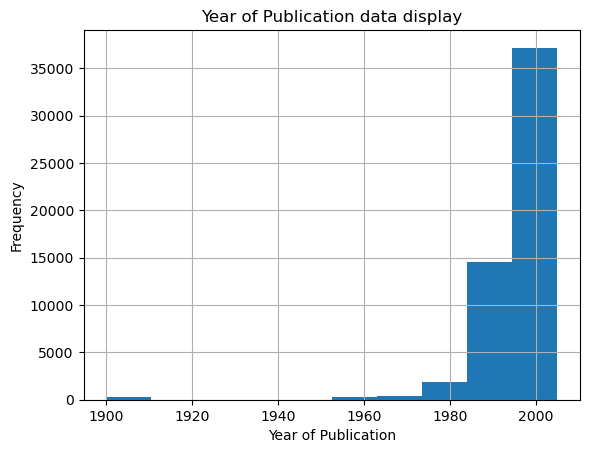

In [25]:
books['Year-Of-Publication'].hist(bins=10)

plt.title('Year of Publication data display')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

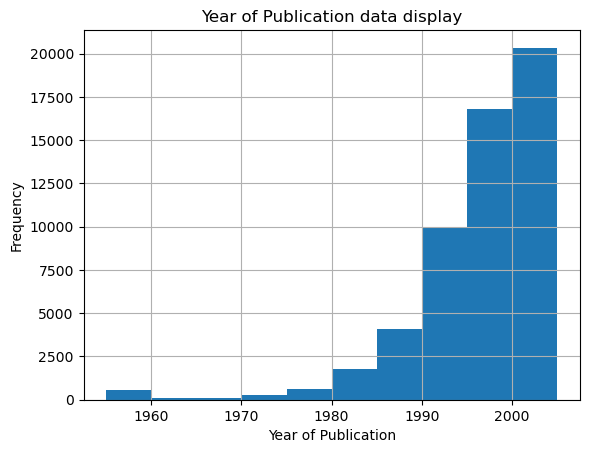

In [26]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].clip(upper=2024, lower=1955)

books['Year-Of-Publication'].hist(bins=10)

plt.title('Year of Publication data display')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.show()

In [28]:
# classify publication years into bins
bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

books['Year-Of-Publication-Bin'] = pd.cut(books['Year-Of-Publication'], bins=bins, right=False)
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,Year-Of-Publication-Bin-Encode,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded
0,277427,002542730X,10,politically correct bedtime story modern tale ...,James Finn Garner,1994,John Wiley & Sons Inc,"[1990, 2000)",2660,622,4,gilbert,others,usa,48,40~60,3064,23,6
1,277427,0060006641,10,writing well th anniversary classic guide writ...,William Zinsser,2001,HarperResource,"[2000, 2010)",6400,525,5,gilbert,others,usa,48,40~60,3064,23,6
2,277427,0060542128,7,storm break,Heather Lowell,2003,HarperTorch,"[2000, 2010)",2330,528,5,gilbert,others,usa,48,40~60,3064,23,6
3,277427,0061009059,9,one money stephanie plum novel paperback,Janet Evanovich,1995,HarperTorch,"[1990, 2000)",2766,528,4,gilbert,others,usa,48,40~60,3064,23,6
4,277427,0152050167,10,whale rider,Witi Ihimaera,2003,Harcourt Paperbacks,"[2000, 2010)",6405,495,5,gilbert,others,usa,48,40~60,3064,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54809,35433,3499123665,10,die hexen von eastwick roman,John Updike,1987,Rowohlt Tb.,"[1980, 1990)",3145,1018,4,wangen,others,others,40,20~40,8858,23,3
54810,35433,3499150425,10,garp und wie er die welt sah,John Irving,1982,Rowohlt Tb.,"[1980, 1990)",3083,1018,4,wangen,others,others,40,20~40,8858,23,3
54811,35433,3548253881,9,da spiel,Stephen King,2002,Ullstein Tb,"[2000, 2010)",5762,1223,5,wangen,others,others,40,20~40,8858,23,3
54812,35433,3596259924,7,die unertragliche leichtigkeit de seins unbear...,Milan Kundera,1997,Distribooks Inc,"[1990, 2000)",4476,314,4,wangen,others,others,40,20~40,8858,23,3


In [29]:
# encode authors and publishers
label_encoder = LabelEncoder()

books['Book-Author-Encode'] = label_encoder.fit_transform(books['Book-Author'])
books['Book-Publisher-Encode'] = label_encoder.fit_transform(books['Book-Publisher'])
books['Year-Of-Publication-Bin-Encode'] = label_encoder.fit_transform(books['Year-Of-Publication-Bin'])

books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher,Year-Of-Publication-Bin,Book-Author-Encode,Book-Publisher-Encode,Year-Of-Publication-Bin-Encode,User-City,User-State,User-Country,User-Age,User-Age-Bin,User-City_Encoded,User-State_Encoded,User-Country_Encoded
0,277427,002542730X,10,politically correct bedtime story modern tale ...,James Finn Garner,1994,John Wiley & Sons Inc,"[1990, 2000)",2144,474,4,gilbert,others,usa,48,40~60,3064,23,6
1,277427,0060006641,10,writing well th anniversary classic guide writ...,William Zinsser,2001,HarperResource,"[2000, 2010)",5227,396,5,gilbert,others,usa,48,40~60,3064,23,6
2,277427,0060542128,7,storm break,Heather Lowell,2003,HarperTorch,"[2000, 2010)",1879,399,5,gilbert,others,usa,48,40~60,3064,23,6
3,277427,0061009059,9,one money stephanie plum novel paperback,Janet Evanovich,1995,HarperTorch,"[1990, 2000)",2236,399,4,gilbert,others,usa,48,40~60,3064,23,6
4,277427,0152050167,10,whale rider,Witi Ihimaera,2003,Harcourt Paperbacks,"[2000, 2010)",5232,369,5,gilbert,others,usa,48,40~60,3064,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54809,35433,3499123665,10,die hexen von eastwick roman,John Updike,1987,Rowohlt Tb.,"[1980, 1990)",2554,782,3,wangen,others,others,40,20~40,8858,23,3
54810,35433,3499150425,10,garp und wie er die welt sah,John Irving,1982,Rowohlt Tb.,"[1980, 1990)",2502,782,3,wangen,others,others,40,20~40,8858,23,3
54811,35433,3548253881,9,da spiel,Stephen King,2002,Ullstein Tb,"[2000, 2010)",4695,940,5,wangen,others,others,40,20~40,8858,23,3
54812,35433,3596259924,7,die unertragliche leichtigkeit de seins unbear...,Milan Kundera,1997,Distribooks Inc,"[1990, 2000)",3650,235,4,wangen,others,others,40,20~40,8858,23,3


In [ ]:
# deal with text data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# def preprocess_text(text):
    #casefolding, remove non-letters, preposition words, lemmatization

    #text = str(text).lower()
    #letters = re.sub('[^a-zA-Z]', ' ', text)
    #tokens = word_tokenize(letters)
    #stop_words = set(stopwords.words('english'))
    #tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    #text = ' '.join(tokens)
    #return text


# Loop through each row in the DataFrame using index
#casefolding, remove non-letters, preposition words, lemmatization
for idx in books.index:
    text = str(books.loc[idx, 'Book-Title']).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    processed_text = ' '.join(tokens)
    books.loc[idx, 'Book-Title'] = processed_text

books.to_csv('cleaned_books.csv', index=False)
# books['Book-Title'] = books['Book-Title'].apply(preprocess_text)
books['Book-Title']